In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [110]:
file_names = [ "dati-orari-Trieste molo F.lli Bandiera-%4d%02d.csv"%(year,month) for month in range(1,13) for year in [2021,2022]]

file_names = [ "dati-orari-Boa Paloma (fino al 06_02_2018)-%4d%02d.csv"%(year,month) for month in range(1,13) for year in [2022]]


def readcsv(args):
    return pd.read_csv(args, sep=";",skipfooter=3)

data_tot = pd.concat(map(readcsv, file_names))


In [111]:
# data_tot["Direzione Vento gradi N"].iloc[]
ll = len(data_tot)
print(sum([data_tot["Direzione Vento gradi N"].iloc[i]=="-" and data_tot["Vento med km/h"].iloc[i]=="-" for i in range(ll)]))
# print(sum(data_tot["Vento med km/h"]=="-"))

4284


In [112]:
ll = len(data_tot)
wind_dir = [ [ data_tot["Vento med km/h"].iloc[i], data_tot["Direzione Vento gradi N"].iloc[i] ] for i in range(ll) \
            if (not isinstance(data_tot["Vento med km/h"].iloc[i], str) and  not isinstance(data_tot["Direzione Vento gradi N"].iloc[i] , str)  ) ]


In [113]:
wind_dir = np.array(wind_dir)
H, speed_edges, dir_edges = np.histogram2d(wind_dir[:,0],wind_dir[:,1],bins=20)

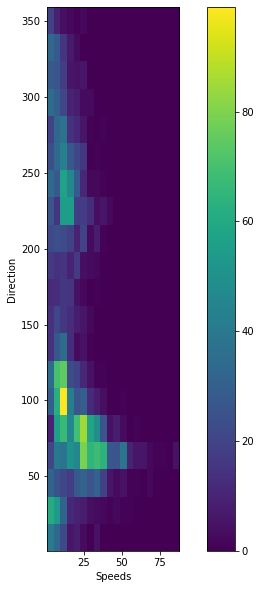

In [114]:
fig = plt.figure(figsize=(10,10))
plt.imshow(H.T, origin='lower',
        extent=[speed_edges[0], speed_edges[-1], dir_edges[0], dir_edges[-1]])
plt.xlabel("Speeds")
plt.ylabel("Direction")
plt.colorbar()